# **Creating ANN (Artificial Neural Network) Model Using Keras**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


This is data set for bank where the target column is 'Exited' which means whether the customer will continue his bank account or he will quit in future

In [4]:
dataset.shape

(10000, 14)

In [5]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
# Separating dependent and independent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [7]:
# Converting Categorical Features to numeric (using one hot encoding)
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [8]:
# Concatenate the Data Frames
X = pd.concat([X, geography, gender],axis=1)

In [9]:
# Drop Unnecessary columns
X = X.drop(['Geography','Gender'],axis=1)

In [10]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


## Train test split

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
X_train.shape

(8000, 11)

In [13]:
## Interview question whether we require feature scaling in dl or not, if yes why?
# Ans: Yes we require because if the features are scaled then multiplication happens quickly i.e. computation time is less so we will do feature scaling

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ANN Model starts

In [15]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [16]:
# Initialising the ANN
classifier = Sequential()

## Adding the layers 

In [17]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu', input_dim = 11))

# units is nothing but the neurons in first hidden layer
# kernel_initializer is nothing but various weight intialization technique
# activation is nothing but activation function
# input_dim is nothing but the input layer (since we have 11 input features (x) we have given 11)

In [18]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [19]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

## Compiling the ANN model

In [20]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the model to Training set

In [21]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 10s 2ms/step - loss: 0.5840 - accuracy: 0.7580 - val_loss: 0.4955 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4951 - accuracy: 0.7930 - val_loss: 0.4634 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4748 - accuracy: 0.7908 - val_loss: 0.4533 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4461 - accuracy: 0.8030 - val_loss: 0.4485 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4485 - accuracy: 0.8002 - val_loss: 0.4452 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4598 - accuracy: 0.7927 - val_loss: 0.4429 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 991us/step - loss: 0.4378 - accuracy: 0.7988 - val_loss: 0.4410 - val_accuracy: 0.7

In [22]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


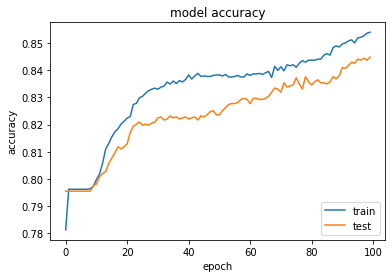

In [23]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

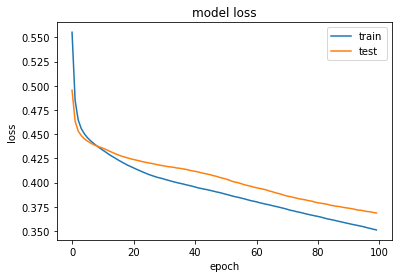

In [24]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Predicting for Test data

In [25]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

## Checking the Accuracy of the Model

In [26]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1523,   72],
       [ 224,  181]], dtype=int64)

In [27]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.852

# Checking the Model accuracy by adding the Droupout Layers

In [28]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation='relu', input_dim = 11))

In [29]:
# Adding the dropout neurons
classifier.add(Dropout(0.3))

In [30]:
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))

In [31]:
# Adding the dropout neurons
classifier.add(Dropout(0.3))

In [32]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [33]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [34]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs = 100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.7027 - accuracy: 0.8022 - val_loss: 0.5783 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5982 - accuracy: 0.7864 - val_loss: 0.5292 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5276 - accuracy: 0.8044 - val_loss: 0.5153 - val_accuracy: 0.7955
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5187 - accuracy: 0.7978 - val_loss: 0.5094 - val_accuracy: 0.7955
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5239 - accuracy: 0.7867 - val_loss: 0.5058 - val_accuracy: 0.7955
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5126 - accuracy: 0.7967 - val_loss: 0.5035 - val_accuracy: 0.7955
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.5104 - accuracy: 0.7986 - val_loss: 0.4968 - val_accuracy: 0.7955

In [35]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1483,  112],
       [ 183,  222]], dtype=int64)

In [37]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_pred,y_test)
acc_score

0.8525

So in the model if some neurons are dropped but we got the 79.7% accuacy